¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Este proceso es muy parecido al que se recibe de un gerente o de un Senior Data Scientist en un trabajo real, por lo que te estarás preparando para la experiencia en la vida real.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

## Descripción del proyecto

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

### Descripción de datos

Características

* RowNumber: índice de cadena de datos
* CustomerId: identificador de cliente único
* Surname: apellido
* CreditScore: valor de crédito
* Geography: país de residencia
* Gender: sexo
* Age: edad
* Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
* Balance: saldo de la cuenta
* NumOfProducts: número de productos bancarios utilizados por el cliente
* HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
* IsActiveMember: actividad del cliente (1 - sí; 0 - no)
* EstimatedSalary: salario estimado

Objetivo

* Exited: El cliente se ha ido (1 - sí; 0 - no)

## Importar librerias

In [133]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_error

## Importar base de datos para análisis


In [134]:
# # Importar dataset

df = pd.read_csv('/datasets/Churn.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, usaste una celda para importar las librerías y otra para leer los datos.
</div>

## Explorar dataset y diagnóstico

In [135]:
# Explorar dataset
print(df.shape)
print()
print("*****************************************************************")
print(df.head())
print()
print("*****************************************************************")
print(df.info())
print()
print("*****************************************************************")
print(df.describe())


(10000, 14)

*****************************************************************
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58   

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

Encontramos que existen valores ausentes en la columna tenure, y revisando los datos vamos a sustituirlos más adelante por la mediana. Sobre los datatype, considero que están correctos y no es necesario modificarlos. También vemos que las columnas RowNumber, CustomerId, Surname no aportarían datos al análisis del modelo, es mas, meterían más ruido, entonces las quitaremos.

## Preparación de datos

Voy a realizar el análisis de la información utilizando dos técnicas de codificación: codificación de etiquetas y codigicación One-hot. Para ello, voy a crear dos dataframes diferentes, uno para analizar cada una de las técnicas. El primero se llamara df_encoder que servirá para probar la primer técnica, y el segundo, df_test, que servirá para la segunda técnica.


### Técnica codificación de etiquetas

In [136]:
# Descargar la base de datos en un dataframe
df_encoder = pd.read_csv('/datasets/Churn.csv')

# Sustituir los valores ausentes por la mediana
df_encoder['Tenure'] = df_encoder['Tenure'].fillna(df_encoder['Tenure'].median())

# Eliminar las columnas que no se van a utilizar
df_encoder = df_encoder.drop(['RowNumber','CustomerId','Surname'], axis=1)

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para crear otro data frame que contiene los mismos datos que un dataframe que ya tienes no es necesario volver a leer de la misma tabla puedes crear una copia:
    
```
df_encoder = df.copy()    
```
</div>

In [137]:
# Estandarizar los datos numéricos
numeric = ["CreditScore","Age", "Tenure", "Balance", "EstimatedSalary"]

scaler = StandardScaler()
scaler.fit(df_encoder[numeric])
df_encoder[numeric] = scaler.transform(df_encoder[numeric])


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, se escalaron correctamente los datos.
</div>

In [138]:
# Aplicar la técnica de codificación de etiquetas
encoder = OrdinalEncoder()
data = pd.DataFrame(encoder.fit_transform(df_encoder), columns=df_encoder.columns)

# Separar el dataset en entrenamiento, validación y prueba
df_train, df_temp = train_test_split(data, test_size=0.4, random_state=12345)
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345)


# Separar el dataset en features y target
target_train = df_train['Exited']
features_train = df_train.drop('Exited', axis=1)
target_valid = df_valid['Exited']
features_valid = df_valid.drop('Exited', axis=1)
target_test = df_test['Exited']
features_test = df_test.drop('Exited', axis=1)

print(features_train.shape)


(6000, 10)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Se dividieron correctamente los datos en entrenamiento y prueba.
</div>

In [139]:
# Usar el modelo de DecisionTreeClassifier y entrenar el modelo
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)

accuracy_test = accuracy_score(target_test, predicted_test)

print(accuracy_test)

0.7945


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Entrenaste correctamente usando árboles de decisión.
</div>

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


<Axes: xlabel='Exited'>

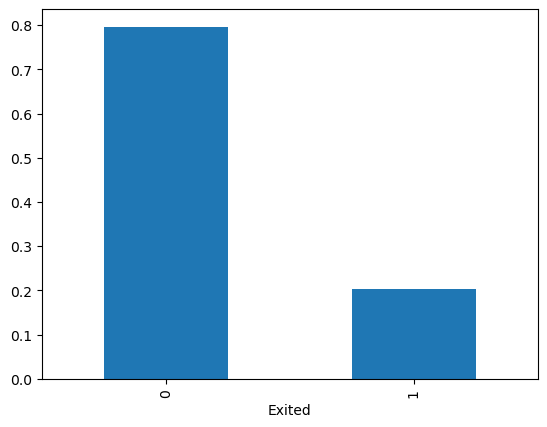

In [140]:
# Revisar como esta balanceado el dataset
class_frequency = df_encoder['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind="bar")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, la gráfica muestra correctamente como es el desbalance de datos.
</div>

In [141]:
# Aplicar la matriz de confusión
conf_matrix = confusion_matrix(target_test, predicted_test)
print(conf_matrix)

[[1391  186]
 [ 225  198]]


In [142]:
# Calcular el recall
recall = recall_score(target_test,predicted_test)
print(recall)

0.46808510638297873


In [143]:
# Calcular la precisión
precision = precision_score(target_test, predicted_test)
print(precision)

0.515625


In [144]:
# Calcular el f1
f1 = f1_score(target_test, predicted_test)
print(f1)

0.49070631970260226


Al revisar la información utilizando la técnica de codificación de etiquetas obtuve un F1 de 0.4907, el cual esta muy lejos del 0.59 que buscamos. También, pude encontrar que hay un gran desequilibrio de clases, y esta técnica no es buena para cuanto se tiene esa situación

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen comentario aún se puede mejorar bastante al modelo.
</div>

### Técnica codificación One-hot

In [145]:
# Descargar la base de datos en un dataframe
df_test = pd.read_csv('/datasets/Churn.csv')

# Sustituir los valores ausentes por la mediana
df_test['Tenure'] = df_test['Tenure'].fillna(df_test['Tenure'].median())

# Eliminar las columnas que no se van a utilizar
df_test = df_test.drop(['RowNumber','CustomerId','Surname'], axis=1) # 'Geography','CreditScore'

In [146]:
# Estandarizar los datos numéricos
numeric = ["CreditScore","Age", "Tenure", "Balance", "EstimatedSalary"]

scaler = StandardScaler()
scaler.fit(df_test[numeric])
df_test[numeric] = scaler.transform(df_test[numeric])

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Con el uso del método copy, aquí también te pudiste ahorrar estos bloques de celdas y crear otro data frame basado en el que tenías arriba.
</div>

In [147]:
# Aplicar la técnica de codificación One-hot
data_ohe = pd.get_dummies(df_test, drop_first=True)

# Separar el dataset en entrenamiento, validación y prueba
df_train, df_temp = train_test_split(data_ohe, test_size=0.4, random_state=12345)
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345)

# Separar el dataset en features y target
target_train = df_train['Exited']
features_train = df_train.drop('Exited', axis=1)
target_valid = df_valid['Exited']
features_valid = df_valid.drop('Exited', axis=1)
target_test = df_test['Exited']
features_test = df_test.drop('Exited', axis=1)

print(features_train.shape)

(6000, 11)


In [148]:
# Usar el modelo LogisticRegression, entrenar el modelo y probarlo con el dataset de validación y prueba

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
predicted_test = model.predict(features_test)
print('F1:', f1_score(target_test, predicted_test))
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4775086505190312
F1: 0.4888507718696398


El score F1 sigue estando lejos de nuestro objetivo de por lo menos 0.59, entonces haré un balance de clases, primero un sobremuestreo y luego un submuestreo

In [149]:
# Aplicar sobremuestreo para balancear el dataset
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 5
)


print(target_upsampled.shape)
print(target_upsampled.value_counts(normalize=True))
print(target_upsampled.value_counts())




(10784,)
Exited
1    0.554525
0    0.445475
Name: proportion, dtype: float64
Exited
1    5980
0    4804
Name: count, dtype: int64


In [150]:
# Usar el modelo LogisticRegression, entrenar el modelo y probarlo con el dataset de validación y prueba
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_test, predicted_test))
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4834996162701458
F1: 0.4847094801223242


El score F1 en el modelo de regresión logística realmente no tuvo una mejora significativa con el sobremuestreo

In [151]:
# Aplicar submuestreo para balancear el dataset
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25
)

print(target_downsampled.shape)
print(target_downsampled.value_counts(normalize=True))
print(target_downsampled.value_counts())

(2397,)
Exited
0    0.501043
1    0.498957
Name: proportion, dtype: float64
Exited
0    1201
1    1196
Name: count, dtype: int64


In [152]:
# Usar el modelo LogisticRegression, entrenar el modelo y probarlo con el dataset de validación y prueba
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)

predicted_test = model.predict(features_test)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_test, predicted_test))
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.48417450812660395
F1: 0.48406546080964685


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso del up y down sample.
</div>

El score F1 en el modelo de regresión logistica realmente no tuvo una mejor significativa con el submuestreo

Ahora vamos usar el Decision Tree Classifier (modelo de arbol) para ver si hacemos que el score F1 aumenta

In [153]:
# Modelo DecisionTreeClassifier con el dataset de validación y sobremuestreo
best_score_dtc = 0
best_f1 = 0
best_depth = 0
for depth in range(1,10):
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth,class_weight='balanced' )
    model_dtc.fit(features_upsampled,target_upsampled)
    predictions_valid = model_dtc.predict(features_valid)
    score = accuracy_score(target_valid,predictions_valid)
    f1 = f1_score(target_valid, predictions_valid) # calculate the F1 score
    if score > best_score_dtc:
        best_score_dtc = score
        best_f1 = f1 # store the best F1 score
        best_depth = depth
print("DecisionTreeClassifier")
print("El mejor max_depth =", best_depth, "con una exactitud de:", best_score_dtc)
print("El mejor F1 score:", best_f1)
print()



DecisionTreeClassifier
El mejor max_depth = 5 con una exactitud de: 0.8105
El mejor F1 score: 0.5963791267305644



El modelo de arbol con el conjunto de validación y el sobremuestreo ya alcancó el score F1 que estabamos buscando, ahora vamos a probarlo pero con el conjunto de prueba

In [154]:
# Modelo DecisionTreeClassifier con el dataset de prueba y sobremuestreo
best_score_dtc = 0
best_f1 = 0
best_depth = 0
for depth in range(1,10):
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth,class_weight='balanced')
    model_dtc.fit(features_upsampled,target_upsampled)
    predictions_test = model_dtc.predict(features_test)
    score = accuracy_score(target_test,predictions_test)
    f1 = f1_score(target_test, predictions_test) # calculate the F1 score
    if score > best_score_dtc:
        best_score_dtc = score
        best_f1 = f1 # store the best F1 score
        best_depth = depth
print("DecisionTreeClassifier")
print("El mejor max_depth =", best_depth, "con una exactitud de:", best_score_dtc)
print("El mejor F1 score:", best_f1)
print()

DecisionTreeClassifier
El mejor max_depth = 5 con una exactitud de: 0.798
El mejor F1 score: 0.5809128630705395



El score F1 con el conjunto de validación bajo a 0.5809, entonces con el modelo de árbol, usando la técnica de sobremuestreo, no llegamos a nuestro valor objetivo que es de al menos 0.59

Vamos a probar ahora el mismo modelo de arbol pero con submuestreo

In [155]:
# Modelo DecisionTreeClassifier con el dataset de validación y submuestreo
best_score_dtc = 0
best_f1 = 0
best_depth = 0
for depth in range(1,10):
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth,class_weight='balanced' )
    model_dtc.fit(features_downsampled,target_downsampled)
    predictions_valid = model_dtc.predict(features_valid)
    score = accuracy_score(target_valid,predictions_valid)
    f1 = f1_score(target_valid, predictions_valid) # calculate the F1 score
    if score > best_score_dtc:
        best_score_dtc = score
        best_f1 = f1 # store the best F1 score
        best_depth = depth
print("DecisionTreeClassifier")
print("El mejor max_depth =", best_depth, "con una exactitud de:", best_score_dtc)
print("El mejor F1 score:", best_f1)
print()



DecisionTreeClassifier
El mejor max_depth = 5 con una exactitud de: 0.8
El mejor F1 score: 0.5943204868154158



El modelo de arbol con el conjunto de validación y el submuestreo ya alcancó el score F1 que estabamos buscando, ahora vamos a probarlo pero con el conjunto de prueba

In [156]:
# Modelo DecisionTreeClassifier con el dataset de prueba y submuestreo
best_score_dtc = 0
best_f1 = 0
best_depth = 0
for depth in range(1,10):
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth,class_weight='balanced')
    model_dtc.fit(features_downsampled,target_downsampled)
    predictions_test = model_dtc.predict(features_test)
    score = accuracy_score(target_test,predictions_test)
    f1 = f1_score(target_test, predictions_test) # calculate the F1 score
    if score > best_score_dtc:
        best_score_dtc = score
        best_f1 = f1 # store the best F1 score
        best_depth = depth
print("DecisionTreeClassifier")
print("El mejor max_depth =", best_depth, "con una exactitud de:", best_score_dtc)
print("El mejor F1 score:", best_f1)
print()

DecisionTreeClassifier
El mejor max_depth = 5 con una exactitud de: 0.811
El mejor F1 score: 0.608695652173913



Finalmente, lo logramos, ya tenemos un score F01 igual o mayor a 0.59 con el conjunto de prueba.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Usaste un ciclo for para encontrar el mejor modelo de Decision Tree iterando sobre la profundidad, esto ayuda a explorar varias configuraciones de hiperparámetros.
</div>

## Curva PR y Curva AUC-ROC

Vamos a calcular la curva PR para ver el rendimiento del modelo en términos de precisión y recall

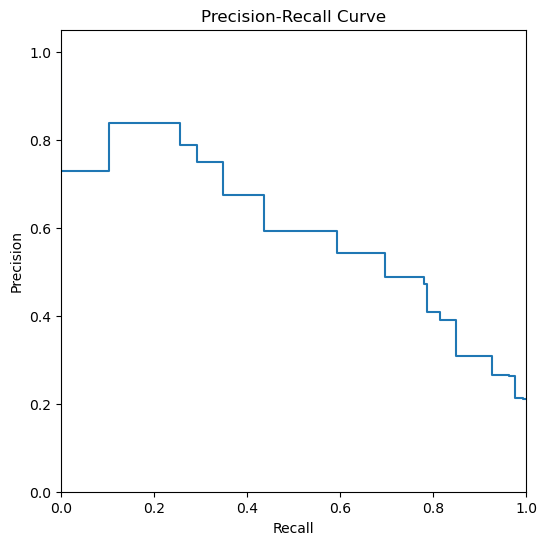

In [157]:
# Curva PR
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=5,class_weight='balanced')
model_dtc.fit(features_downsampled,target_downsampled)

probabilities_test = model_dtc.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(
    target_test, probabilities_test[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

Vamos a calular la Curva ROC

Text(0.5, 1.0, 'Curva ROC')

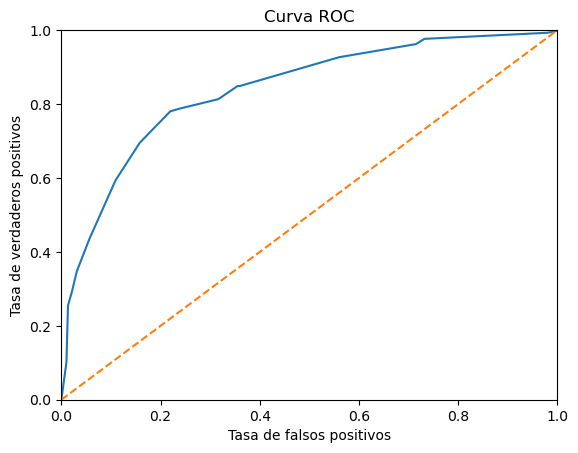

In [158]:
# Curva ROC
probabilities_test = model_dtc.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) # < escribe el código aquí >

plt.figure()

# < traza la gráfica >
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente! La curva ROC se ve muy bien.
</div>

Con base en la gráfica podemos ver que el modelo es bueno ya que la linea ROC se aleja bastante de la linea diagonal.

In [159]:
# Calcular el score AUC-ROC
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print("AUC-ROC score:",auc_roc)

AUC-ROC score: 0.8383867684249502


Con base en el score AUC-ROC podemos ver el modelo es bueno, tiene una buena capacidad de distinguir entre clases

## Conclusiones

Despúes de realizar varias pruebas pudimos encontrar que el mejor modelo para predecir si un cliente se va ir del banco o no es el modelo de árbol, utilizando una codificación One-hot y aplicando la técnica de submuestreo para el equilibrio de las clases.

Esta se conclusión se obtuvo por dos indicadores. El primero fue el F1, que debia ser igual o mayor a 0.59, y el segundo es el score AUC-ROC que fue de 0.8383, el cual se considera bueno.

Con este modelo podemos crear estrategias junto con el banco para adelantarnos a las posibles salidas de clientes y ver que medidas tomar para que esto no suceda.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones basadas en lo observado en el proyecto, además obtuviste un modelo que supera el umbra solicitado.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!
    
Te quiero felicitar por tu proyecto, está bastante completo y se nota que manejas muy bien el lenguaje python. La exploración de distintos modelos hasta dar con uno que superará el umbral de F1 de 0.59 fue correcta. Puedo aprobar tu proyecto, éxito en los siguientes sprints. 
</div>